In [12]:
# auto-load when code changes outside
%load_ext autoreload
%autoreload 2
%load_ext pyinstrument

import sys
sys.path.insert(0,'..')


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The pyinstrument extension is already loaded. To reload it, use:
  %reload_ext pyinstrument


In [13]:
#imports 
import os
import numpy as np
import pandas as pd
import torchvision.transforms as T
import matplotlib.image as mpimg

from src.utils import plot_image, plot_im, save_im


In [19]:
# data_location='/home/salnabulsi/coat-of-arms/data/cropped_coas/out_valid'
# data_location='/home/salnabulsi/coat-of-arms/data/cropped_coas/out'
# data_location='/Users/salnabulsi/tub/coat-of-arms/data/cropped_coas/out_valid'

data_location='/Users/salnabulsi/tub/coat-of-arms/data/cropped_coas/out'
test_caption_file  = data_location + '/test_real_captions_psumsq.txt'
root_folder_images = data_location + '/images/'
# root_folder_images = data_location + '/images/resized/'

df = pd.read_csv(test_caption_file)

print("There are {} test images".format(len(df)))

df

There are 269 test images


,image,caption,psum,psum_sq
0,1739_A G cross patonce.jpg,A G cross patonce,724933.00000,557413.50000
1,22117_O B cross patriarchal.jpg,O B cross patriarchal,696633.87500,521719.93750
2,2870_O S lion rampant.jpg,O S lion rampant,370219.71875,231043.09375
3,6870_S O eagle.jpg,S O eagle,840800.62500,661782.93750
4,18746_S A eagle.jpg,S A eagle,880971.43750,601956.43750
...,...,...,...,...
264,398_A S lion rampant.jpg,A S lion rampant,673480.62500,517651.34375
265,249_O G 2 lions passt.jpg,O G 2 lions passt,871046.06250,677358.06250
266,4459_B O eagle.jpg,B O eagle,621500.62500,425808.43750
267,5302_O B cross moline.jpg,O B cross moline,736149.62500,530970.68750


In [24]:
ls = []
ims_size = []
for im_name in df['image']:
    image_full_path = root_folder_images + '/' + im_name
    img = mpimg.imread(image_full_path)
    trans = T.ToTensor()
    img_t = trans(img)
    ls.append( img_t.shape )
# ls

In [25]:
hist, bin_edges = np.histogram(ls)
hist, bin_edges

(array([298,  30, 293, 147,  27,   2,   6,   2,   0,   2]),
 array([   3. ,  213.2,  423.4,  633.6,  843.8, 1054. , 1264.2, 1474.4,
        1684.6, 1894.8, 2105. ]))

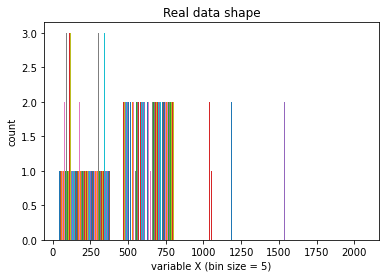

In [36]:
import numpy as np
import random
from matplotlib import pyplot as plt

plt.hist(ls, 5)

# plt.hist(bins, bins=hist, alpha=0.5)
plt.title('Real data shape')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()
